<h1 align="center"  style='font-size:30px'> 🏀 <a style="color:white;font-weight:700;background-color:black;">⛹️NBA</a><a style="color:red;font-weight:700;background-color:black;">2K</a><a style="color:white;font-weight:700;background-color:black;">20</a> : <a style="color:black;">Data Visualization</a> </h1>

This is a visualization for NBA2K20 dataset kindly provided by <a href="https://www.kaggle.com/isaienkov/nba2k20-player-dataset">isainekov</a>.

**NBA 2K20** is a basketball simulation video game developed by Visual Concepts and published by 2K Sports, based on the National Basketball Association (NBA). It is the 21st installment in the NBA 2K franchise, the successor to NBA 2K19, and the predecessor to NBA 2K21. Anthony Davis of the Los Angeles Lakers is the cover athlete for the regular edition of the game, while Dwyane Wade is the cover athlete for the 'Legend Edition'.NBA 2K20 was released on September 6, 2019, for Microsoft Windows, Nintendo Switch, PlayStation 4, and Xbox One, and on November 18, 2019 for Stadia.

The player mainly plays NBA games with real-life or customized players and teams; games follow the rules and objectives of NBA games. Several game modes are present and many settings can be customized. Up to six expansion teams can be created and used in both MyLeague and MyGM Modes, with the possibility of a 36-team league, and any team can be relocated and rebranded.

<img style="width:100%;height:100%" src="https://4y96.com/wp-content/uploads/2020/04/nba2k20-banner_0.jpg"/>
<h3 align="center" style='font-size:10px'>Image source : 4y96.com</h3>

### Basic Library

In [1]:
# Data wrangling and math
import numpy as np
import pandas as pd 

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Datetime module
from datetime import datetime, date

# Data Exploration

### Let's take a look at the data

In [2]:
df = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3


In [3]:
print(f'There are {df.shape[0]} players (rows) and {df.shape[1]} columns.\n')
print(f'Column names: {df.columns.values}')

There are 429 players (rows) and 13 columns.

Column names: ['full_name' 'rating' 'jersey' 'team' 'position' 'b_day' 'height' 'weight'
 'salary' 'country' 'draft_year' 'draft_round' 'draft_peak']


### Which player got the best and worst rating?

In [4]:
print(f"The best rating is {df.rating.max()} which are held by 👑{df[df.rating == df.rating.max()].full_name.values[0]} and {df[df.rating == df.rating.max()].full_name.values[1]}\n")
print(f"The worst rating is {df.rating.min()} which is held by {df[df.rating == df.rating.min()].full_name.values[0]}")

The best rating is 97 which are held by 👑LeBron James and Kawhi Leonard

The worst rating is 67 which is held by Duncan Robinson


### What about players' favorite jersey number?

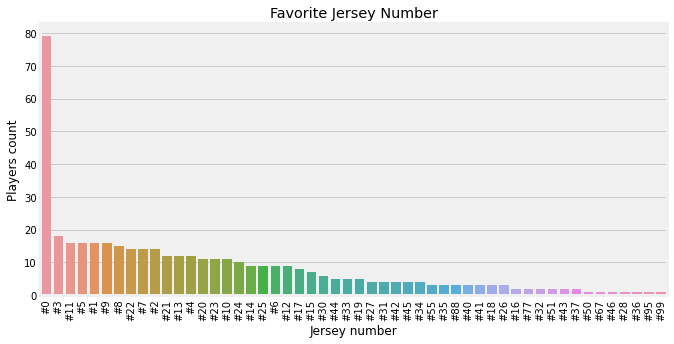

In [5]:
jersey_number = df[['jersey','full_name']].groupby('jersey').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=jersey_number.index, y=jersey_number.full_name)
plt.xticks(rotation=90)
plt.xlabel('Jersey number')
plt.ylabel('Players count')
plt.title('Favorite Jersey Number')
plt.show()

Wow! There are tons of players with #0 on their jersey compared to other number.

### How about players' country?

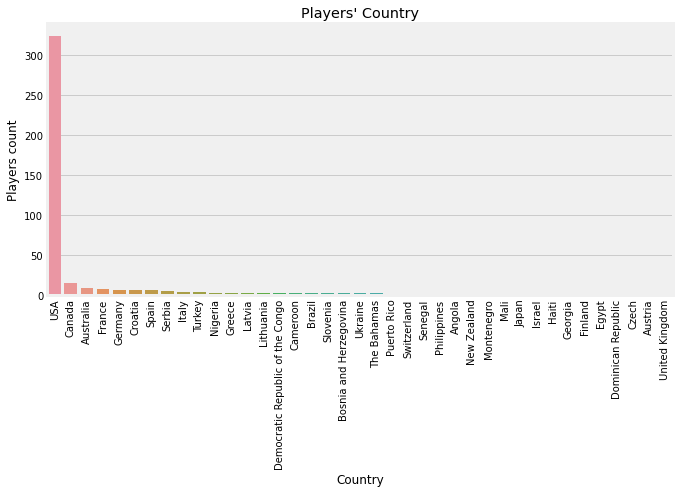

In [6]:
country = df[['country','full_name']].groupby('country').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country.index, y=country.full_name)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Players count')
plt.title('Players\' Country')
plt.show()

Of course, it's USA. Now, which country got the best average rating?

### Country based on rating

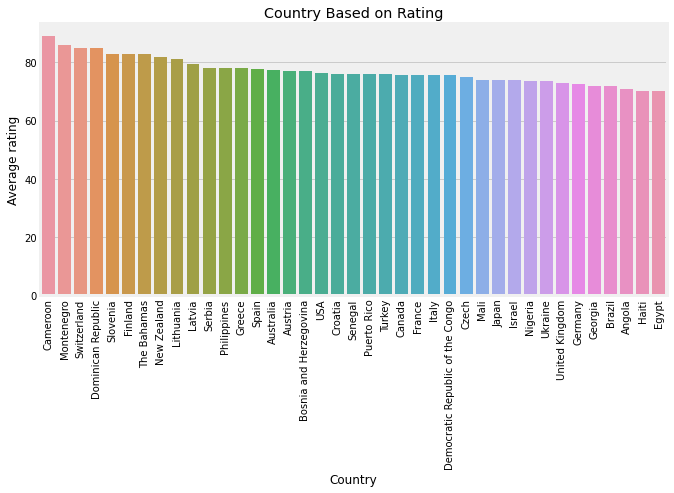

In [7]:
country_rating = df[['country','rating']].groupby('country').mean().sort_values(by='rating', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country_rating.index, y=country_rating.rating)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average rating')
plt.title('Country Based on Rating')
plt.show()

### Which team is the most diverse?

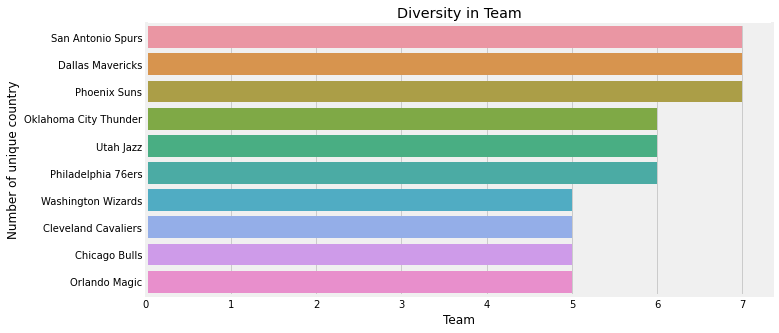

In [8]:
country_nunique = df.groupby(df['team'])['country'].nunique().sort_values(ascending = False).head(10)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country_nunique.values, y=country_nunique.index)
plt.xticks()
plt.xlabel('Team')
plt.ylabel('Number of unique country')
plt.title('Diversity in Team')
plt.show()

### How old are the players?

In [9]:
def get_age(birthday): 
    today = date.today() 
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age

df['b_day'] = pd.to_datetime(df['b_day'])
df['age'] = df['b_day'].apply(lambda x : get_age(x))
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,35
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,29
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,25
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,31
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,24
425,Michael Frazier,68,#21,Houston Rockets,G,1994-03-08,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,26
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,1997-11-20,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,22
427,Jalen Lecque,68,#0,Phoenix Suns,G,2000-06-13,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,20


In [10]:
print(f"The oldest player is {df[df.age == df.age.max()].full_name.values[0]} ({df.age.max()} years old)\n")
print(f"The youngest player are {df[df.age == df.age.min()].full_name.values[0]} and {df[df.age == df.age.min()].full_name.values[1]} ({df.age.min()} years old)")

The oldest player is Pau Gasol (40 years old)

The youngest player are Sekou Doumbouya and Talen Horton-Tucker (19 years old)


### Any free agents?

In [11]:
free_agents = df[df['team'].isna()]
print(f'There are {free_agents.shape[0]} free agents.')
free_agents.head(3)

There are 23 free agents.


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,age
33,DeMarcus Cousins,86,#0,NaN,-,1990-08-13,6-10 / 2.08,270 lbs. / 122.5 kg.,$3500000,USA,2010,1,5,30
168,Michael Beasley,76,#0,NaN,-,1989-01-09,6-10 / 2.08,235 lbs. / 106.6 kg.,$3500000,USA,2008,1,2,31
177,Gerald Green,76,#0,NaN,-,1986-01-26,6-6 / 1.98,192 lbs. / 87.1 kg.,$2564753,USA,2005,1,18,34


### Which team got the best rating?

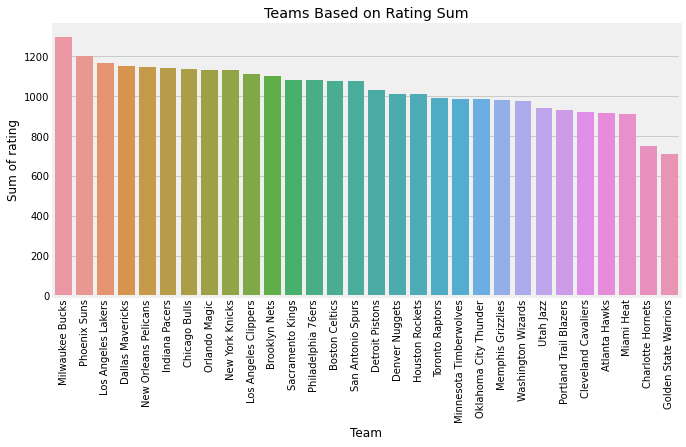

In [12]:
team_rating = df[['team','rating']].groupby('team').sum().sort_values(by='rating', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=team_rating.index, y=team_rating.rating)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Sum of rating')
plt.title('Teams Based on Rating Sum')
plt.show()

 🦌 Milwaukee Bucks got the best sum of rating in total! What happened to, the former 2018 Champions, Golden State Warriors though? In this season, <a href="https://www.nytimes.com/2019/11/13/sports/basketball/golden-state-warriors-kerr.html">The Warriors Are in the Last Place.</a>

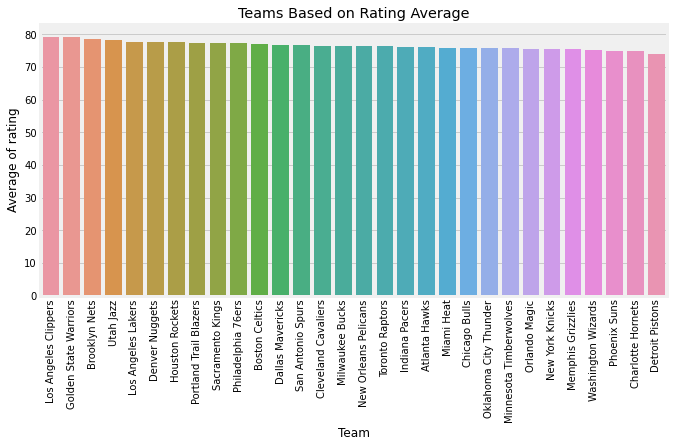

In [13]:
team_rating = df[['team','rating']].groupby('team').mean().sort_values(by='rating', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=team_rating.index, y=team_rating.rating)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average of rating')
plt.title('Teams Based on Rating Average')
plt.show()

Interesting, the average players' rating for each team almost form a linear line. They're quite similiar.

### Which team got the largest number of players?

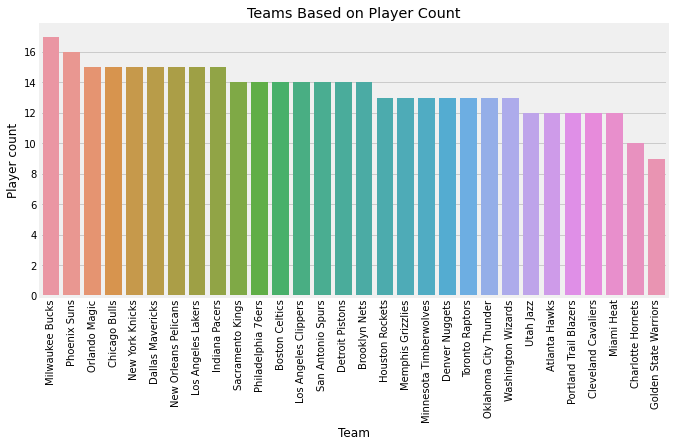

In [14]:
player_count = df[['team','full_name']].groupby('team').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=player_count.index, y=player_count.full_name)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Player count')
plt.title('Teams Based on Player Count')
plt.show()

### Who got the highest and lowest salary?

In [15]:
print(f"The biggest salary is {df.salary.max()} which is held by {df[df.salary == df.salary.max()].full_name.values[0]} \n")
print(f"The lowest salary is {df.salary.min()} which is held by {df[df.salary == df.salary.min()].full_name.values[0]}")

The biggest salary is $9881598 which is held by DeAndre Jordan 

The lowest salary is $100000 which is held by Yante Maten


Now let's look at the salary distribution

In [16]:
def get_salary(salary):
    salary = salary.replace('$', '')
    return float(salary)

df['salary'] = df['salary'].apply(lambda x: get_salary(x))
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,35
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,29
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,25
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,31
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,6-0 / 1.83,180 lbs. / 81.6 kg.,522738.0,USA,2018,Undrafted,Undrafted,24
425,Michael Frazier,68,#21,Houston Rockets,G,1994-03-08,6-3 / 1.91,200 lbs. / 90.7 kg.,79568.0,USA,2015,2,60,26
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,1997-11-20,6-10 / 2.08,200 lbs. / 90.7 kg.,79568.0,Greece,2018,Undrafted,Undrafted,22
427,Jalen Lecque,68,#0,Phoenix Suns,G,2000-06-13,6-3 / 1.91,190 lbs. / 86.2 kg.,898310.0,USA,2019,Undrafted,Undrafted,20


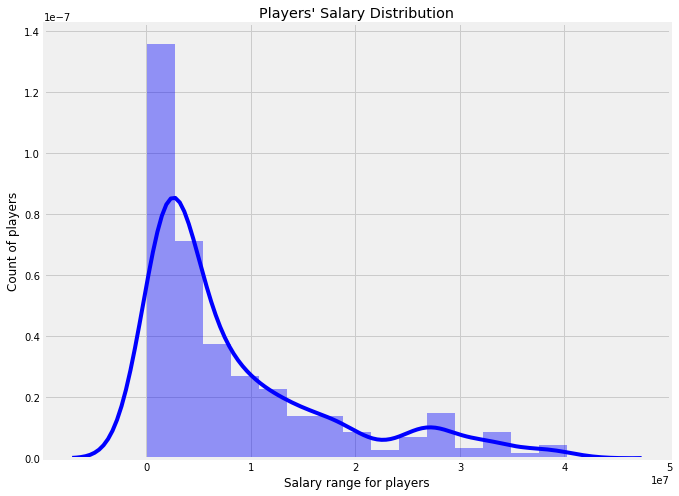

In [17]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.distplot(df['salary'], color = 'blue')
plt.xlabel('Salary range for players')
plt.ylabel('Count of players')
plt.title('Players\' Salary Distribution')
plt.xticks()
plt.show()

### What about their weight & height?

In [18]:
height = df['height'].str.split('/',expand=True)
height.columns = ['height_ft', 'height_m']
df = pd.concat([df, height], axis=1)

weight = df['weight'].str.split('/',expand=True)
weight.columns = ['weight_lbs', 'weight_kg']
df = pd.concat([df, weight], axis=1)
df = df.drop(['weight'], axis=1)
df['weight_lbs'] = df['weight_lbs'].str.replace('lbs.', '')
df['weight_kg'] = df['weight_kg'].str.replace('kg.', '')

# Let's convert the type so it become lighter
df['height_m'] = df['height_m'].astype(np.float64)
df['weight_lbs'] = df['weight_lbs'].astype(np.int32)
df['weight_kg'] = df['weight_kg'].astype(np.float64)

df

,full_name,rating,jersey,team,position,b_day,height,salary,country,draft_year,draft_round,draft_peak,age,height_ft,height_m,weight_lbs,weight_kg
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,37436858.0,USA,2003,1,1,35,6-9,2.06,250,113.4
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,32742000.0,USA,2011,1,15,29,6-7,2.01,225,102.1
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,25842697.0,Greece,2013,1,15,25,6-11,2.11,242,109.8
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,37199000.0,USA,2007,1,2,31,6-10,2.08,230,104.3
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,38199000.0,USA,2009,1,3,31,6-5,1.96,220,99.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,6-0 / 1.83,522738.0,USA,2018,Undrafted,Undrafted,24,6-0,1.83,180,81.6
425,Michael Frazier,68,#21,Houston Rockets,G,1994-03-08,6-3 / 1.91,79568.0,USA,2015,2,60,26,6-3,1.91,200,90.7
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,1997-11-20,6-10 / 2.08,79568.0,Greece,2018,Undrafted,Undrafted,22,6-10,2.08,200,90.7
427,Jalen Lecque,68,#0,Phoenix Suns,G,2000-06-13,6-3 / 1.91,898310.0,USA,2019,Undrafted,Undrafted,20,6-3,1.91,190,86.2


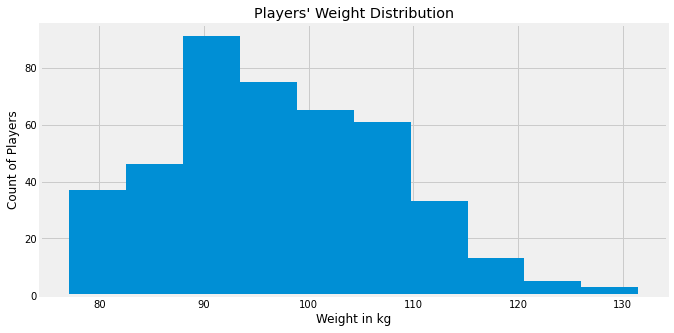

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df.weight_kg)
plt.xlabel('Weight in kg')
plt.ylabel('Count of Players')
plt.title('Players\' Weight Distribution')
plt.show()

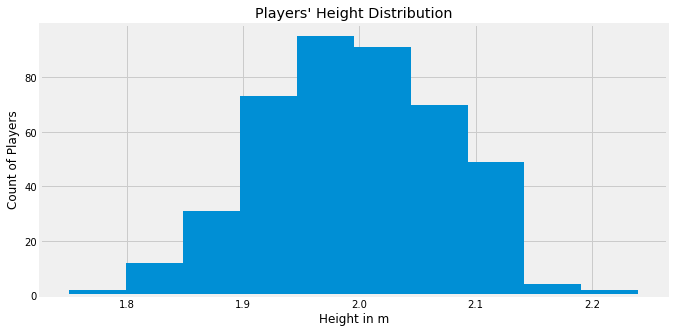

In [20]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df.height_m)
plt.xlabel('Height in m')
plt.ylabel('Count of Players')
plt.title('Players\' Height Distribution')
plt.show()

### What position does most of the players play?

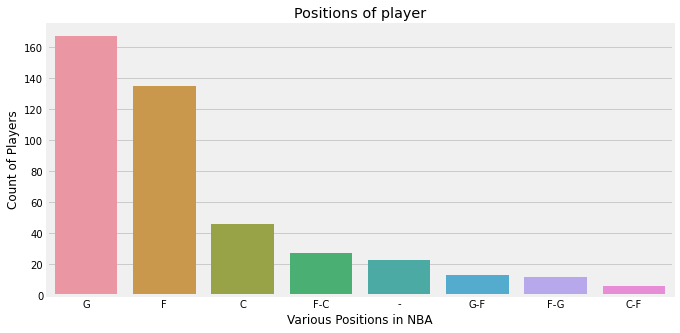

In [21]:
fig = plt.figure(figsize = (10, 5))
sns.countplot('position', data = df, order = df['position'].value_counts().index)
plt.xlabel('Various Positions in NBA')
plt.ylabel('Count of Players')
plt.title('Positions of player')
plt.show()

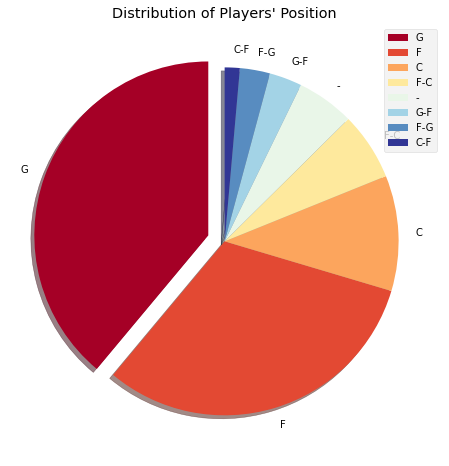

In [22]:
labels = ['G', 'F','C','F-C', '-', 'G-F', 'F-G', 'C-F'] 
size = df['position'].value_counts()
colors = plt.cm.RdYlBu(np.linspace(0, 1, 8))
explode = [0.1,0, 0, 0, 0, 0, 0, 0]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Players\' Position')
plt.legend()
plt.show()

Let's observe the average players' rating for each position

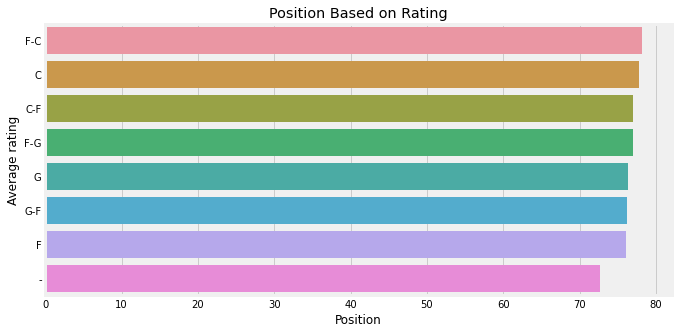

In [23]:
position_rating = df[['position','rating']].groupby('position').mean().sort_values(by='rating', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=position_rating.rating, y=position_rating.index)
plt.xticks()
plt.xlabel('Position')
plt.ylabel('Average rating')
plt.title('Position Based on Rating')
plt.show()

# The Best of The Best

### The Wonderkid
Top 10 Young Players Based on Rating

In [24]:
df.sort_values(['age','rating'], ascending = False).reset_index()[['full_name', 'age', 'team', 'country', 'rating']].tail(10).style.background_gradient('viridis')

,full_name,age,team,country,rating
419,Romeo Langford,20,Boston Celtics,USA,72
420,Kevin Porter,20,Cleveland Cavaliers,USA,72
421,Luka Samanic,20,San Antonio Spurs,Croatia,72
422,Keldon Johnson,20,San Antonio Spurs,USA,72
423,Alen Smailagic,20,Golden State Warriors,Serbia,71
424,Darius Bazley,20,Oklahoma City Thunder,USA,70
425,Isaac Bonga,20,Washington Wizards,Germany,68
426,Jalen Lecque,20,Phoenix Suns,USA,68
427,Sekou Doumbouya,19,Detroit Pistons,France,73
428,Talen Horton-Tucker,19,Los Angeles Lakers,USA,70


### The Old Gold
Top 10 Old Players Based on Rating

In [25]:
df.sort_values(['age','rating'], ascending = False).reset_index()[['full_name', 'age', 'team', 'country', 'rating']].head(10).style.background_gradient('viridis')

,full_name,age,team,country,rating
0,Pau Gasol,40,nan,Spain,75
1,Kyle Korver,39,Milwaukee Bucks,USA,75
2,Tyson Chandler,37,Houston Rockets,USA,73
3,JJ Redick,36,New Orleans Pelicans,USA,80
4,Andre Iguodala,36,Miami Heat,USA,78
5,Jose Juan Barea,36,Dallas Mavericks,Puerto Rico,76
6,LeBron James,35,Los Angeles Lakers,USA,97
7,LaMarcus Aldridge,35,San Antonio Spurs,USA,87
8,Chris Paul,35,Oklahoma City Thunder,USA,85
9,Marc Gasol,35,Toronto Raptors,Spain,82


### Best Shortest Player

In [26]:
df.sort_values(['height','rating'], ascending = True).reset_index()[['full_name', 'height_m', 'team', 'country', 'rating']].head(10).style.background_gradient('viridis')

,full_name,height_m,team,country,rating
0,Jose Juan Barea,1.780000,Dallas Mavericks,Puerto Rico,76
1,Frank Mason,1.800000,Milwaukee Bucks,USA,71
2,Carsen Edwards,1.800000,Boston Celtics,USA,71
3,DJ Augustin,1.800000,Orlando Magic,USA,76
4,Isaiah Thomas,1.750000,nan,USA,76
5,Brandon Goodwin,1.830000,Atlanta Hawks,USA,68
6,Tim Frazier,1.830000,nan,USA,72
7,Aaron Holiday,1.830000,Indiana Pacers,USA,73
8,Tyus Jones,1.830000,Memphis Grizzlies,USA,73
9,Ishmael Smith,1.830000,Washington Wizards,USA,73


### Best Tallest Player

In [27]:
df.sort_values(['height','rating'], ascending = True).reset_index()[['full_name', 'height_m', 'team', 'country', 'rating']].tail(10).style.background_gradient('viridis')

,full_name,height_m,team,country,rating
419,Lauri Markkanen,2.130000,Chicago Bulls,Finland,83
420,Jusuf Nurkic,2.130000,Portland Trail Blazers,Bosnia and Herzegovina,83
421,Nikola Jokic,2.130000,Denver Nuggets,Serbia,90
422,Joel Embiid,2.130000,Philadelphia 76ers,Cameroon,91
423,Pau Gasol,2.160000,nan,Spain,75
424,Jakob Poeltl,2.160000,San Antonio Spurs,Austria,77
425,Rudy Gobert,2.160000,Utah Jazz,France,88
426,Luke Kornet,2.180000,Chicago Bulls,USA,71
427,Kristaps Porzingis,2.210000,Dallas Mavericks,Latvia,87
428,Boban Marjanovic,2.240000,Dallas Mavericks,Serbia,75


### Best Player for Each Position

In [28]:
df.iloc[df.groupby(df['position'])['rating'].idxmax()].sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name',
                    'age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,LeBron James,35,Los Angeles Lakers,USA,97
1,F-G,Giannis Antetokounmpo,25,Milwaukee Bucks,Greece,96
2,G,James Harden,31,Houston Rockets,USA,96
3,F-C,Anthony Davis,27,Los Angeles Lakers,USA,94
4,C,Joel Embiid,26,Philadelphia 76ers,Cameroon,91
5,G-F,Luka Doncic,21,Dallas Mavericks,Slovenia,87
6,-,DeMarcus Cousins,30,nan,USA,86
7,C-F,Al Horford,34,Philadelphia 76ers,Dominican Republic,85


### Best Player for Each Team

In [29]:
df.iloc[df.groupby(df['team'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name',
                    'age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,Kawhi Leonard,29,Los Angeles Clippers,USA,97
1,F,LeBron James,35,Los Angeles Lakers,USA,97
2,F-G,Giannis Antetokounmpo,25,Milwaukee Bucks,Greece,96
3,F,Kevin Durant,31,Brooklyn Nets,USA,96
4,G,James Harden,31,Houston Rockets,USA,96
5,G,Stephen Curry,32,Golden State Warriors,USA,95
6,G,Damian Lillard,30,Portland Trail Blazers,USA,92
7,C,Joel Embiid,26,Philadelphia 76ers,Cameroon,91
8,C,Nikola Jokic,25,Denver Nuggets,Serbia,90
9,F-C,Karl-Anthony Towns,24,Minnesota Timberwolves,USA,89


### Best Player for Each Country

In [30]:
df.iloc[df.groupby(df['country'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name',
                    'age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,LeBron James,35,Los Angeles Lakers,USA,97
1,F-G,Giannis Antetokounmpo,25,Milwaukee Bucks,Greece,96
2,C,Joel Embiid,26,Philadelphia 76ers,Cameroon,91
3,G,Kyrie Irving,28,Brooklyn Nets,Australia,91
4,C,Nikola Jokic,25,Denver Nuggets,Serbia,90
5,C,Rudy Gobert,28,Utah Jazz,France,88
6,G-F,Luka Doncic,21,Dallas Mavericks,Slovenia,87
7,F-C,Kristaps Porzingis,25,Dallas Mavericks,Latvia,87
8,C,Nikola Vucevic,29,Orlando Magic,Montenegro,86
9,C-F,Al Horford,34,Philadelphia 76ers,Dominican Republic,85


<a style="color:blue;font-size:20px;">Work in progress...</a>